In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [4]:
# Config
base_dir = '../'

In [73]:
header_names = ['Date/Time', 'Bridgeport', 'Blair', 'Glen_Morris', 'Road_32']

data = pd.read_excel(base_dir + 'data/processed/2001-2010_cutoff_neghalf_35.xlsx', index_col=0)
data

,Date/Time,Bridgeport,Blair,Glen_Morris,Road_32
0,2001-01-01 07:00:00,0.1,0.1,0.0,0.1
1,2001-01-01 08:00:00,0.2,0.1,0.0,0.1
2,2001-01-01 09:00:00,0.1,0.1,0.0,0.1
3,2001-01-01 10:00:00,0.1,0.1,0.0,0.0
4,2001-01-01 11:00:00,0.1,0.1,0.0,0.0
...,...,...,...,...,...
85352,2010-10-01 19:00:00,15.4,15.7,15.0,15.8
85353,2010-10-01 20:00:00,15.2,15.6,14.7,15.8
85354,2010-10-01 21:00:00,15.1,15.4,14.6,15.7
85355,2010-10-01 22:00:00,15.0,15.2,14.5,15.5


In [6]:
data.dtypes

Date/Time      datetime64[ns]
Bridgeport            float64
Blair                 float64
Glen_Morris           float64
Road_32               float64
dtype: object

In [82]:
import copy

def identify_nan_windows(data):
    nan_idcs = np.where(np.isnan(data))[0]
    nan_windows = []
    current_window = [-1, -1]
    last_idx = None
    for idx in nan_idcs:
        if last_idx != idx - 1:
            # Implications:
            #   1. Start of a new window
            #   2. End of previous window (unless start of sequence)

            if last_idx:
                # Mark end of last window & save
                current_window[1] = last_idx
                nan_windows.append(copy.copy(current_window))
                current_window = [-1, -1]
            
            # Mark start of new window
            current_window[0] = idx


        last_idx = idx
    
    return nan_windows


def plot_series(x_series, y_series, ax, label=""):
    """
    Plot series & shade nodata segments 
    """
    y_data = y_series.to_numpy()
    # data_max = np.nanmax(y_data)
    data_max = 30
    # data_min = np.nanmin(y_data)
    data_min = 0

    nan_windows = identify_nan_windows(y_data)

    ax.plot(x_series, y_series, label=label, alpha=0.8)

    # for start, end in nan_windows:
    #     ax.fill_betweenx([data_min, data_max], x_series[start], x_series[end], alpha=0.2, color='k')

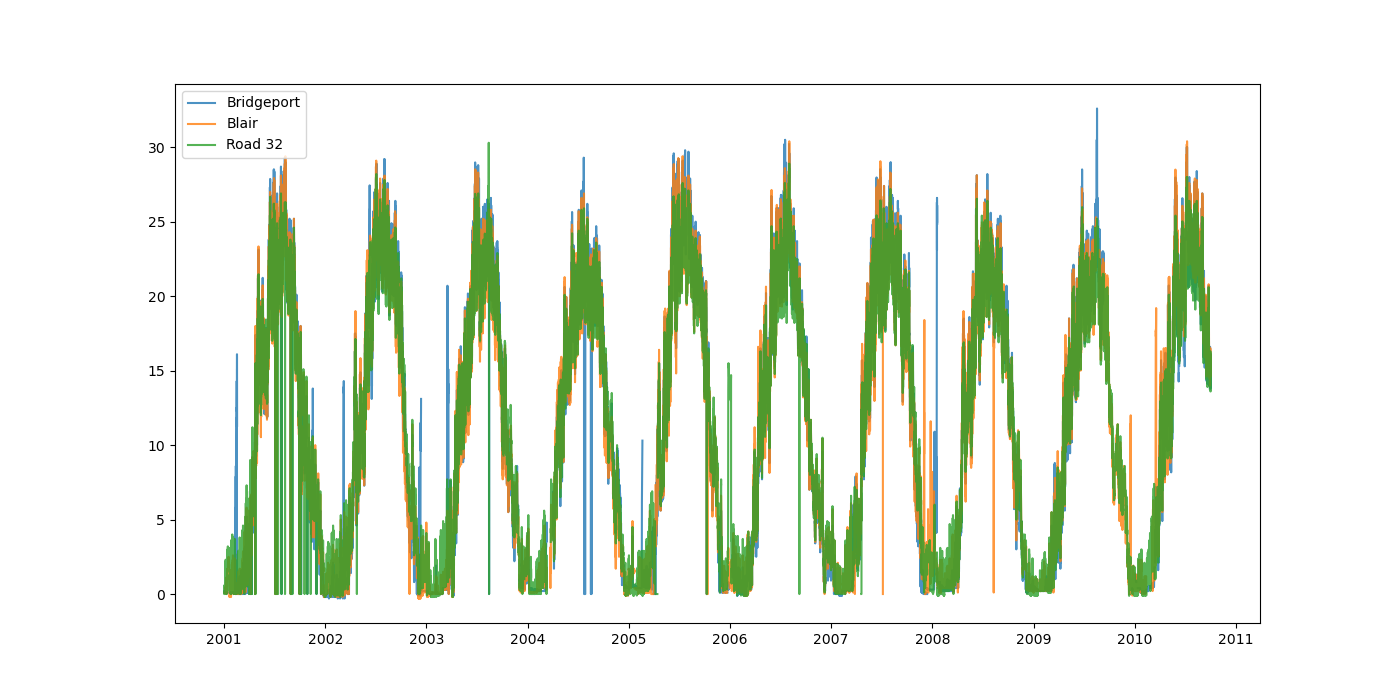

In [83]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(14, 7))

plot_series(data['Date/Time'], data['Bridgeport'], ax, label="Bridgeport")
plot_series(data['Date/Time'], data['Blair'], ax, label="Blair")
# plot_series(data['Date/Time'], data['Glen_Morris'], ax, label="Glen Morris")
plot_series(data['Date/Time'], data['Road_32'], ax, label="Road 32")
ax.legend()

plt.show()

Spectrum

In [8]:
from scipy.signal import welch, get_window

In [32]:
bridgeport_data = data['Bridgeport'].to_numpy()
print(f"N data pts: {bridgeport_data.size}")
nan_idcs = np.where(np.isnan(bridgeport_data))[0]
print(f"NaNs: {nan_idcs.size}, {np.min(nan_idcs)} to {np.max(nan_idcs)}")

N data pts: 85357
NaNs: 4403, 3268 to 83459


In [ ]:
bp_data_nonan = np.copy(bridgeport_data)
bp_data_nonan[np.isnan(bp_data_nonan)] =

In [18]:
fs = 1 / (60*60)  # Hourly samples
# 120 = 5 days at 1 sample / hour

nperseg = 120

bp_fw, bp_power = welch(bridgeport_data, fs=fs, nperseg=nperseg)

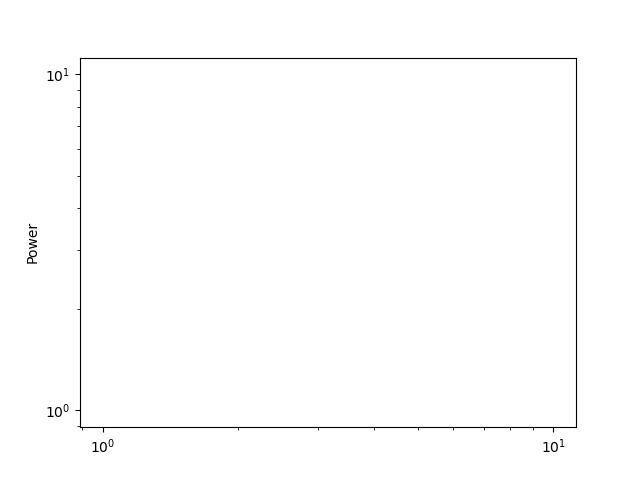

In [12]:
%matplotlib widget

fig, ax = plt.subplots()

ax.loglog(bp_fw, bp_power)
ax.set_ylabel("Power")

plt.show()